# Wrangle Exercises
- For these exercises, you will create wrangle.ipynb and wrangle.py files to hold necessary functions.

In [1]:
# STANDARD LIBRARIES
import os


# THIRD PARTY LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# LOCAL LIBRARIES
import env
import wrangle

Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. 

## Purpose/Plan:
- Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

## 1.

## Acquire

Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [2]:
# Obtained data dictionary .xlsx from Kaggle
dd = pd.read_excel('zillow_data_dictionary.xlsx')
dd

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


In [3]:
df = wrangle.get_zillow_data()

Reading from csv file...


In [4]:
df.head()

,parcel_id,bedrooms,bathrooms,square_feet,tax_assessed_value_USD,year_built,tax_amount,fed_code
0,10759547,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,11193347,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,11215747,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,11229347,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,11324547,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


## 2. 

Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.

## Prepare / Wrangle

### Summarization

In [5]:
# Obtian rows and columns
df.shape

(2152864, 8)

In [6]:
# Obtain Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcel_id,2152864.0,1.309657e+07,5.171556e+06,10711725.00,1.165907e+07,1.259851e+07,1.405609e+07,1.696019e+08
bedrooms,2152853.0,3.287195e+00,9.547568e-01,0.00,3.000000e+00,3.000000e+00,4.000000e+00,2.500000e+01
bathrooms,2152853.0,2.230687e+00,9.992805e-01,0.00,2.000000e+00,2.000000e+00,3.000000e+00,3.200000e+01
square_feet,2144379.0,1.862855e+03,1.222125e+03,1.00,1.257000e+03,1.623000e+03,2.208000e+03,9.525760e+05
tax_assessed_value_USD,2152371.0,4.618961e+05,6.996759e+05,1.00,1.881700e+05,3.276710e+05,5.345270e+05,9.842891e+07
year_built,2143526.0,1.960950e+03,2.216220e+01,1801.00,1.949000e+03,1.958000e+03,1.976000e+03,2.016000e+03
tax_amount,2148422.0,5.634864e+03,8.178909e+03,1.85,2.534972e+03,4.108945e+03,6.414318e+03,1.337756e+06
fed_code,2152864.0,6.048377e+03,2.043329e+01,6037.00,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03


In [8]:
# Obtian data types and non-null counts
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   parcel_id               2152864 non-null  int64  
 1   bedrooms                2152853 non-null  float64
 2   bathrooms               2152853 non-null  float64
 3   square_feet             2144379 non-null  float64
 4   tax_assessed_value_USD  2152371 non-null  float64
 5   year_built              2143526 non-null  float64
 6   tax_amount              2148422 non-null  float64
 7   fed_code                2152864 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 131.4 MB


In [10]:
# Calculate count of nulls for each column
df.isna().sum()

parcel_id                    0
bedrooms                    11
bathrooms                   11
square_feet               8485
tax_assessed_value_USD     493
year_built                9338
tax_amount                4442
fed_code                     0
dtype: int64

In [11]:
# Caculate percentage of nulls in each column to decide whether to drop or impute
df.isna().mean()
# the columns do not have a significant number of nulls, so I do not need to drop the columns, perhaps only the rows with null values

parcel_id                 0.000000
bedrooms                  0.000005
bathrooms                 0.000005
square_feet               0.003941
tax_assessed_value_USD    0.000229
year_built                0.004337
tax_amount                0.002063
fed_code                  0.000000
dtype: float64

In [12]:
#df = df.drop_duplicates('parcel_id')
# df.shape
# No duplicates noted with parcel_id, so dropping that column

(2152864, 8)

In [13]:
# df = df.drop(columns='parcel_id')
# df.head()

,bedrooms,bathrooms,square_feet,tax_assessed_value_USD,year_built,tax_amount,fed_code
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


#### OBSERVATIONS/TAKEAWAYS:
Make observations, visualize, clean, visualize, repeat

COUNTS
- MISING VALUES: bedrooom, bathrooms, square_feet, tax_assessed_value_USD, year_built, tax_amount have lower counts


DATA TYPE Observations
- bedrooms and bathrooms appear to be counts but could be used in arithmatic - keep as float
- fed_code appears to be an identifier (min and max, not much spread), should be 'object,' as it will not be used in arithmatic
- year_built is related to time, and could be added, subtracted/used in arithmatic (if can be an int, then convert, but if nulls - will not be able to convert, so leave as float)
- tax_assessed_value_USD and tax_amount is monetary, keep as float


STATS Observations: 
- min for square_feet is 1 which could be a data error of some sort
- min for tax_assessed_value_USD is 1 which could be a data error of some sort
- difference between mean and median could indicate skew - will want to vosualize
- standard deviation is larger in square_feet, tax_assessed_value_USD, and tax_amount
    - a lot of spread (could mean it is not a normal distribution), would want to visualize
- outliers present where min is significantly different from bottom 25%, or max is significantly different than upper 75%


OTHER Observations to Note in Future Datasets:
- min and max suspicious, given data values; could indicate data error, outliers, or mistakes in labeling (incorrect assumptions on our part)
- std deve = 0, means one number
- arithmetic (numeric) otherwise, string type

#### TASKS AFTER TAKEAWAYS:

Evaluate Task Prioritization By Asking: 
- Here is what I want to do next
    - Is it worth my time to do the task
    - Can I proceed forward with an MVP without this and revisit if time
- Is it something to prevent data exploration and modeling (if numbers are stored in strings - preventing exploration and modeling, for instance)
   

MUST DO:
- MISSING VALUES
    - drop missing value rows in: bedroom, bathrooms, square_feet, tax_assessed_value_USD, year_built, tax_amount have lower counts


COULD DO WITH TIME: 
- DATA TYPE Observations
    - Change data types of fed_code to 'object', year_built to 'int' (after dropping nulls), 


LATER WITH EXPLORATION: 
- Investigate square_feet data; what IS an unreasonable value for square_feet, how many have an unreasonable value?.  
- Investigate tax_assessed_value_USD ; what IS an unreasonable value for square_feet, how many have unreasonable values?
- Investigate outliers in areas of skew or great spread; square_feet, tax_assessed_value_USD, and tax_amount

#### MISSING VALUES

In [47]:
# drop rows (Axis=0) with missing values, verify drop, and verify consistent number of non-null values in each column

# drop rows with nulls
df = df.dropna(axis = 0)

# Verify drop of rows with decreased row numbers in shape
print(f'Shape after dropping rows: {df.shape}') 

# Verify consistent number of values across each series
df.info(show_counts=True)

Shape after dropping rows: (2140235, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   bedrooms                2140235 non-null  float64
 1   bathrooms               2140235 non-null  float64
 2   square_feet             2140235 non-null  float64
 3   tax_assessed_value_USD  2140235 non-null  float64
 4   year_built              2140235 non-null  int64  
 5   tax_amount              2140235 non-null  float64
 6   fed_code                2140235 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 130.6+ MB


#### DATA TYPES

In [27]:
# Convert datatypes to be aligned with use

convert_dict = {'fed_code': object,
                'year_built': int
               }
  
df = df.astype(convert_dict)
print(df.dtypes)

bedrooms                  float64
bathrooms                 float64
square_feet               float64
tax_assessed_value_USD    float64
year_built                  int64
tax_amount                float64
fed_code                   object
dtype: object


### Visualize Distributions

### Histogram
- To visualize overall distributions

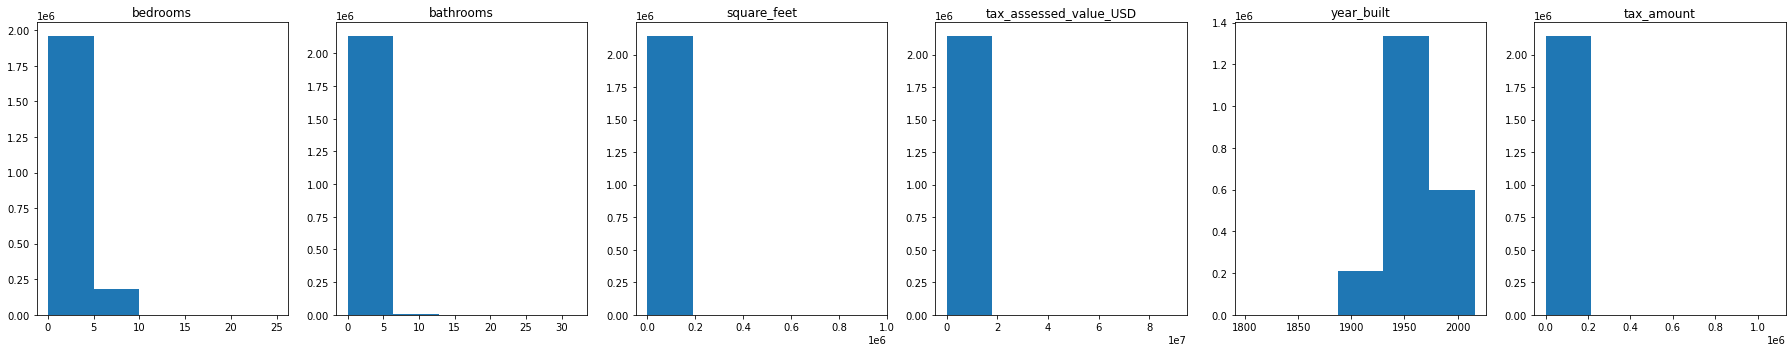

In [49]:
# list of numeric columns
cols = [col for col in df.columns if col not in ['fed_code']]

# figsize width to height
plt.figure(figsize=(25, 5))

# loop to iterate over columns
for i, col in enumerate(cols):
        
        # i starts at 0 but plot numbers should start at 1
        plot_number = i + 1
        
        # create subplot
        plt.subplot(1, len(cols), plot_number)
        
        # create title with the column name
        plt.title(col)
        
        # display a histogram for each of the columns            
        df[col].hist(bins=5)
        
        # Hide gridlines.
        plt.grid(False)
         
        # turn off scientific notation
        plt.ticklabel_format(useOffset=False)
    
plt.tight_layout()
plt.show()

#### Takeaways - 
- Bedrooms, bathrooms, square_feet, tax_assessed_value_USD and tax_amount are not very helpful in seeing the spread because they are too narrow in scope. May indicate outliers.

### Boxplot
- To visualize skew and comparrisons 

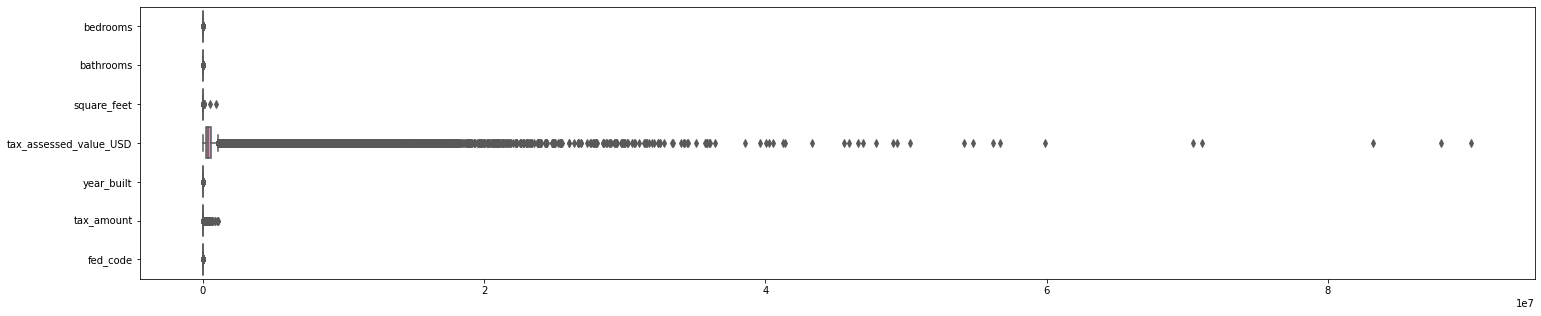

In [57]:
plt.figure(figsize=(25, 5))
ax = sns.boxplot(data=df, orient="h", palette="Set2")
plt.show()

#### Takeaways - 
-  This visualization is not very helpful because the tax assessed value is very right tailed. 
-  Instead, vizualise like categories together

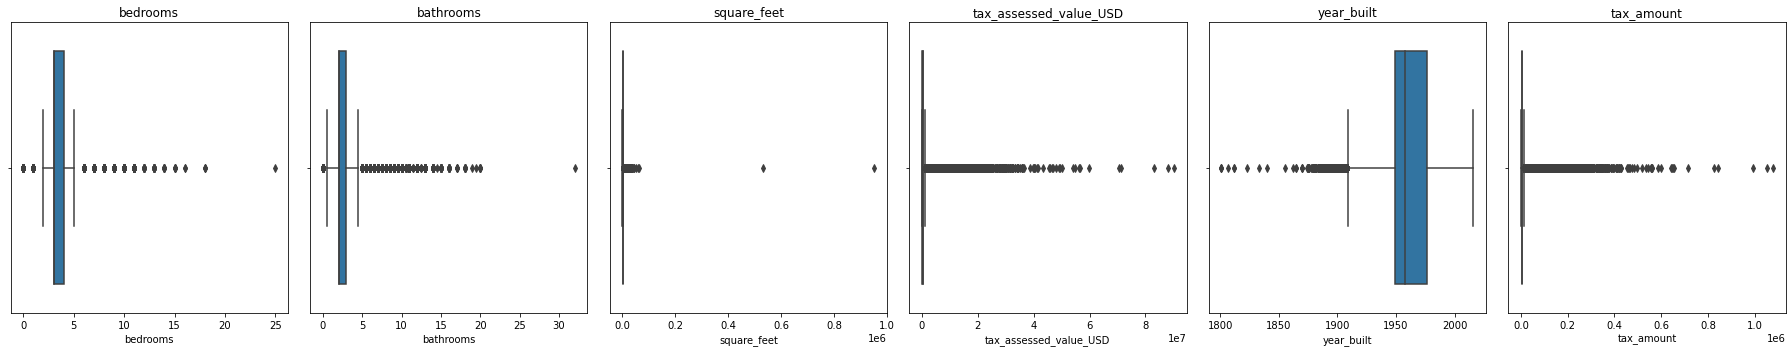

In [62]:
# Visualize Boxplot/Skew


# list of numeric columns
cols = [col for col in df.columns if col not in ['fed_code']]

# figsize width to height
plt.figure(figsize=(25, 5))

# loop to iterate over columns
for i, col in enumerate(cols):
        
        # i starts at 0 but plot numbers should start at 1
        plot_number = i + 1
        
        # create subplot
        plt.subplot(1, len(cols), plot_number)
        
        # create title with the column name
        plt.title(col)
        
        # display a histogram for each of the columns            
        sns.boxplot(df[col])
        
        # Hide gridlines.
        plt.grid(False)
         
      
    
plt.tight_layout()
plt.show()

- Takeaways
Data is skewed due to outliers
Clear outiers in all categories
Scales are not helpful

Better to remove prior to scaling

## 3. 

Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [ ]:
def wrangle_zillow(df):
    
    convert_dict = {'fed_code': object,
                'year_built': int
               }
     

    # drop rows with nulls
    df = df.dropna(axis = 0)
    
    # convert datatypes
    df = df.astype(convert_dict)
    
    return df
    
    